<a href="https://colab.research.google.com/github/Minhvt34/Machine-Learning-notes/blob/main/Important_Machine_Learning_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Machine Learning notes***



> 1. How to put more weight on certain features in machine learning?

First of all - one should probably not do it. The whole concept of machine learning is to use statistical analysis to assign optimal weights. You are interfering here with the whole concept, thus you need really strong evidence that this is crucial to the process you are trying to model, and for some reason your model is currently missing it.

That being said - there is general answer. This is purely model specific, some of which will allow you to weight features - in random forest you could bias distribution from which you sample features to analyse towards the ones that you are interested in; in SVM it should be enough to just multiply given feature by a constant - rememeber when you were told to normalize your features in SVM? This is why - you can use the scale of features to 'steer' your classifier towards given features. The ones with high values will be preffered. This will actually work for any weight norm-regularized model (regularized logistic regression, ridge regression, lasso etc.)



> 2.  Can I use ogistic regression for a time series forecasting problem?

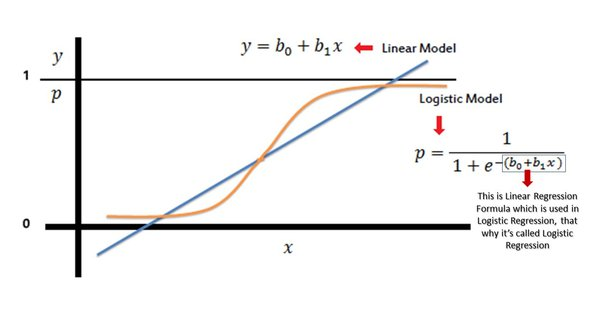



Answer: Not at all, because time series is autocorrelated by its own past value i.e the value recorded in the one time affected by its past value. There are several methods used in time series like Exponential Smoothing, ARIMA(Seasonal or Non Season), etc.
\\
Logistic Regression is a classification technique. It is used on the binary data outcome. i.e the outcome in the form of Yes/No, T/F, S/F, 1/0



> A note about set() and dict in Python - HashMap vs HashTable





* https://www.softlogicsys.in/hash-tables-and-hashmaps-in-python/

* Hashtables and Hashmaps are two different names for the exact same data structure. Python doesn't really use either name, and prefers to use "dictionary" instead.

* Hashsets are basically hashtables with no values, just the key Python sets are implemented like that.



# > About distribution distance



1. Are Mutual Information and Kullback-Leibler divergence equivalent?
- Mutual Information is not a metric. A metric $d$ satisfies the identity of indisceribles: $d(x, y) = 0$ if and only if $x = y$. This is not true of mutual information, which behaves in the opposite manner -- zero mutal information implies that two random variables are independent (as far from identical as you can get). And, if two random variables are identical, they have maximal mutual information (as far from zero as you can get).

- KL divergence is not a metric. It's not symmetric and doesn't satisfy the triangle inequality (in Euclidean geometry, theorem that the sum of any two sides of a triangle is greater than or equal to the third side; in symbols, a + b >= c. In essence, the theorem states that the shortest distance between two points is a straight line.).

* Mutual information and KL divergence are not equivalent. However, the mutual information $I(X,Y)$ between random variables $X$ and $Y$ is given by the KL divergence between the joint distribution $p_{XY}$ and the product of the marginal distributions $p_X ⊗ p_Y$ (what the joint distribution would be if $X$ and $Y$ were independent). \\
$I(X, Y) = D_{KL} (p_{XY} || p_X ⊗ p_Y)$.
Although mutual information is not itself a metric, there are metrics based on it. For example, the variation of information: \\
$VI(X, Y) = H(X, Y) - I(X, Y) = H(X) + H(Y) - 2I(X, Y)$ \\ 
where $H(X)$ and $H(Y)$ are the marginal entropies and $H(X, Y)$ is the joint entropy.

* There are two analytical distributions $p(x)$ and $q(x)$, and you want to calculate distance between them, $D(p, q)$.
There are a plenty of measures of distance between two distributions: \\
* Kullback-Liebler
* Mutual information
* Total variation
* Hellinger distance
* Alpha family of divergences and so on \\
As $p(x)$ and $q(x)$ are complex it is almost impossible that there exists analytical expression for some $D(p, q)$, so you will need a numerical way to calculate those distances. Note, that calculation almost all distances involves numerical integration - so they will be rather imprecise if $x$ dimension is high. \\
* The Kullback-Leibler divergence measures the distance between two distributions: $P(X, Y)$ and $P(X).P(Y)$. On the other hand, Mutual information measures the amount of information that one random variables $X$ contains about another random variable $Y$. However, It is possible to relate both metrics as: \\
$I(X, Y) = H(X) + H(Y) - H(X, Y) = D_{KL}(P(X, Y) || P(X).P(Y))$ \\
Besides, both metrics are only zero when the r.v. are independent. \\
$$P(X, Y) = P(X).P(Y) → \begin{cases} I(X, Y) = H(X) + H(Y) - (H(X) + H(Y)) = 0 \\
D_{KL}(P(X,Y) || P(X).P(Y)) = 0.
\end{cases}$$

\\
* If you want a symmetric metric and both metrics encode similar information, IMHO the choise of MI seems straightforward.

# > About Keras TimeDistributed(Dense) vs Dense layer

* `TimeDistributed(Dense)` applies a same dense to every time step during GRU/LSTM Cell unrolling.
So the error function will be between predicted label sequence and the actual label sequence.
(Which is normally the requirement for sequence to sequence labeling problems).

However, `with return_sequences = FALSE`, `Dense` layer is applied only once at the last cell. This is normally the case when RNNs are used for classification problems. If `return_sequences = TRUE` then `Dense` layer is applied to every time step just like `TimeDistributed(Dense)`.

So for as per your models both are same, but if you change your second model to `return_sequences=False`, then `Dense` will be applied only at the last cell. Try changing it and the model will throw as error because then the `Y` will be of size `[Batch_size, InputSize]`, it is no more a sequence to sequence but a full sequence to label problem.

```bash
from keras.models import Sequential
from keras.layers import Dense, Activation, TimeDistributed
from keras.layers.recurrent import GRU
import numpy as np

InputSize = 15
MaxLen = 64
HiddenSize = 16

OutputSize = 8
n_samples = 1000

model1 = Sequential()
model1.add(GRU(HiddenSize, return_sequences=True, input_shape=(MaxLen, InputSize)))
model1.add(TimeDistributed(Dense(OutputSize)))
model1.add(Activation('softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop')


model2 = Sequential()
model2.add(GRU(HiddenSize, return_sequences=True, input_shape=(MaxLen, InputSize)))
model2.add(Dense(OutputSize))
model2.add(Activation('softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop')

model3 = Sequential()
model3.add(GRU(HiddenSize, return_sequences=False, input_shape=(MaxLen, InputSize)))
model3.add(Dense(OutputSize))
model3.add(Activation('softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='rmsprop')

X = np.random.random([n_samples,MaxLen,InputSize])
Y1 = np.random.random([n_samples,MaxLen,OutputSize])
Y2 = np.random.random([n_samples, OutputSize])

model1.fit(X, Y1, batch_size=128, nb_epoch=1)
model2.fit(X, Y1, batch_size=128, nb_epoch=1)
model3.fit(X, Y2, batch_size=128, nb_epoch=1)

print(model1.summary())
print(model2.summary())
print(model3.summary())
```

In the above example architecture of `model1` and `model2` are sample (sequence to sequence models) and `model3` is a full sequence to label model.

# About Covariance and Correlation

Covariance is also distinct from correlation, another statistical metric often used to measure the relationship
between two variables. While covariance measures the direction of a relationship between two variables, correlation measures the strength of that relationship. This is usually expressed through a correlation coefficient coefficient, which can range from -1 to +1.

\* Importance: While the covariance does measure the directional relationship between two assets, it does not measure show the strength of the relationship between the two assets; the coefficient of correlation is a more appropriate indicator of this strength.

A correlation is considered strong if the coefficient of correlation has a value close to +1(positive correlation) or -1(negative correlation). A coefficient that is close to zero indicates that there is only a weak relationship between the two variables.

For reference: https://www.investopedia.com/terms/c/covariance.asp

# About Python Software Engineering JD

This is an exciting opportunity for an experienced Python engineer who is passionate about open source software, Linux, and cloud-native computing. This is a role for individual contribution through high quality, Pythonic code. We're looking for evidence of technical leadership, exceptional design and intuitive documentation.

You’ll be responsible for designing and maintaining a Python framework and surrounding tools that enable the creation and management of Charmed Operators - software that drives software.

You’ll be designing and implementing the foundation for software operators that can run anywhere, from bare metal to Kubernetes in the cloud.  You’ll work closely with other teams in Canonical to ensure the framework provides a reliable, easy-to-use solution that scales to production workloads and meets the needs of our customers looking to adopt cutting-edge technology.

In addition to the core framework development, this team has responsibilities in the Charmed Operator community, for which Charmhub is the centre. You'll get the chance to work not just with the broad range of talent within Canonical, but the broader open source community. The Charmed Operator ecosystem is made up of Charmed Operators themselves, but also Juju, Pebble and more. Come and help build a thriving community, and contribute to a broad range of technologies that ensure seamless software operations at scale for some of the biggest names in tech.

In addition to this role, we are hiring for engineers with experience in operating and automating different classes of software. From Data Platform to Observability and MLOps; if you have experience in automating or operating these kinds of software, then please seek out those roles, or indicate your experience in your application to this role.

What you’ll do
Write high quality, rigorously designed Python software
Collaborate proactively with a globally distributed team
Display technical leadership internally and within our external communities
Debug issues and produce high quality code to fix them
Contribute to technical documentation that define best practices for authoring high quality operators
Discuss ideas and collaborate on finding good solutions
Work from home with global travel 2 to 4 weeks for internal and external events
Who you are
You have a Bachelor’s or equivalent in Computer Science, STEM or similar degree
You have deep experience and history of writing modern, maintainable Python
You love technology and working with brilliant people
You are curious, flexible, articulate, and accountable
You value soft skills and are passionate, enterprising, thoughtful, and self-motivated
You have interest and experience with two or more of the following: Linux, Kubernetes, Public cloud, OpenStack, LXC/LXD, Python, Go, Debian packaging, scalable web services

Questions to mark:
1. Outline your practical Python software engineering experience and level of competence
2. Outline your practical experience using, configuring and managing Linux systems
3. Outline your practical experience building and maintaining a popular software library or project
4. Outline your experience working within an open source community



# How to deal with imbalanced data?

If you don't have too much data and the imbalance is not too extreme, the typical way to deal with it is to simply reweigh the samples such that the loss function considers the positive and negative samples equally. When you have an overwhelming amount of negative samples, you may want to downsample them to minimize training latency.

But not all samples are equal! At TikTok for example, for their recommendation engine, they use a non-uniform negative sampling scheme they developed with the University of Connecticut: https://lnkd.in/gRsFSr2d 
They proved that optimal sampling of the negative class is done when giving more weight to samples with a higher probability of being positive (Theorem 3). This means that it is better to keep samples that are confusing for a model. This way, the model focuses on learning how to separate true positive samples from negative samples that look like positive ones.

Interesting enough, this theorem also means sampling bias is a good thing!
In ML applications, a model shows users some samples they are likely to engage with. When they don't engage with those, they become negative samples for the next training batch. That is sampling bias because only the samples with a high probability of engagement ever get shown to users and they never get the opportunity to interact with the "lesser" samples so we never get signals for those.

By sampling the data, we bias the probability estimates coming out of the model and they become meaningless. The model is not calibrated anymore. To fix that, they came up with a correction of the likelihood function to generate unbiased estimates of the model parameters, and therefore the probabilities (see eq 5).

Practically, you follow this process to sample down negative samples:

1) Uniformly sample the negative class such that the data becomes balanced.
2) Train a model with balanced data. They call it a "pilot" model.
3) Predict the full data with that pilot model. You get an estimate of how much the model believes the sample is a positive one.
4) Normalize that probability p by the everage probability w and multiply by the sampling rate r: r*p/w
5) For each negative sample pick a uniform random number u. if u < r*p/w, keep the sample, remove it otherwise. The greater p is, the more likely we will keep it.
6) r*p/w is the sampling probability. When training the model or predicting, correct the log-odds using that probability.

Pretty simple process to follow! This is a simplified version of the more optimal approach, but they consider this approach satisfactory.

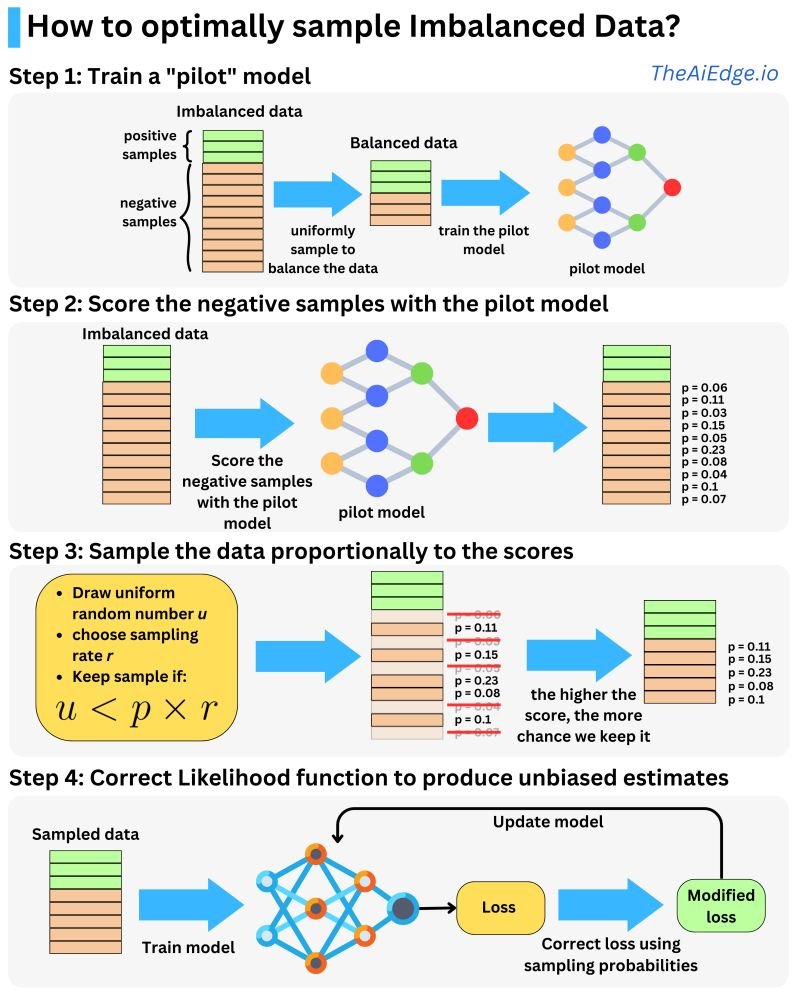

# About T-SNE and UMAP Dimensionality Reduction

If you want to impress your friends at Data Science dinner parties with beautiful plots, t-SNE and UMAP are the way to go! These are significant dimensionality reduction techniques widely used in data analysis, machine learning, and data visualization. These techniques are particularly useful when dealing with high-dimensional data, where traditional visualization methods become impractical or ineffective. We look at:

T-SNE

UMAP

Additional learning materials with GitHub repositories, articles and Youtube videos

T-SNE
For the longest time, I had no idea what t-SNE was! For some reason, it was very fashionable a couple of years ago and everybody was plotting their t-SNE visualization of some random data. Every time it came up in a conversation, I would just suddenly have something "very important" to do! I ramped up on it since then, and I am glad I did because it could be quite useful if I want to impress my friends at Data Science dinner parties with beautiful plots!

So do you need yet another dimensionality reduction algorithm? In a sense, t-SNE (Stochastic Neighbor Embedding with student's t-distribution) is not too different from Principal Component Analysis (PCA) or Independent Component Analysis (ICA) when they are used for dimensionality reduction: you want to project the data in a subspace that captures more intrinsic meaning of the data than the original space.

For PCA, you rotate the axes to maximize the variance in each direction of the space. As a consequence the new variables (components) are statistically orthogonal. The first components capture more of the actual signal within the data. For ICA, you rotate the axes to minimize the pairwise covariate Mutual Information such that the resulting components are independent in a probabilistic sense. You decompose the data into a linear combination of independent signals. For t-SNE you maximize the similarity between the probability distribution of the pairs of data points in the original space and the pairs of data points in the new space. 


Originally Geoffrey Hinton & co (again!) assumed a non-symmetric Gaussian distribution of the data points pair distances for both the original space and the reduced one. It was SNE: “[Stochastic Neighbor Embedding](https://cs.nyu.edu/~roweis/papers/sne_final.pdf)”. They then used a Cauchy distribution (student's t-distribution with 1 degree of freedom) to model the pairs in the reduced space and symmetrized the distributions. And this was called t-SNE (because of the student's t-distribution): “[Visualizing Data using t-SNE](https://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)“. The idea was to learn the new components by minimizing the KL distance between the distributions of the 2 spaces such that the distribution of the data in the original space seems similar to the one in the new space. The KL distance is minimized by simple gradient descent. If the new space is 2-dimensional, you can then plot it in a 2D plot preserving the original pairwise proximity of the different data points.

t-SNE is available in scikit-learn if you want to play with it: sklearn.manifold.TSNE. Check out this awesome embedding toolbox by TensorFlow where you can visualize t-SNE: “[Embedding Projector](https://projector.tensorflow.org/)”! I feel that one of the silent heroes in the emergence of Data Science in the past decade has been the expansion of data visualization tools. It is less glamorous than many Deep Learning discoveries, but I am not sure where we would be without those!

UMAP
UMAP might be one of the most utilized Dimension Reduction techniques right now, and it is mostly due to the intuitive data visualizations that result from it. One aspect that makes this method somewhat different from other Dimension Reduction techniques is the solid theoretical foundation in algebraic topology and topological data analysis of the underlying algorithm.

The idea of UMAP (Uniform Manifold Approximation and Projection) is quite similar to t-SNE as it is trying to understand the relationship between the different objects in the high dimensional space and find a projection in a lower dimensional space that preserves those relationships. T-SNE computes similarities between the different objects as a function of Euclidean distances where UMAP is trying to take into account the topology of the high dimensional space. The topology here means that UMAP adapts the similarity metric to the local density of the data points. 

To understand the local density, UMAP looks at the k-nearest neighbors, how far they may be, to build the similarity metrics between 2 data points. The first nearest neighbor receives a similarity value of 1 and the further points have a decreasing similarity value from there as the function of the local density. So 2 points very far from each other in Euclidean distance may have the same mutual similarities as 2 other points that are very close to each other in another region of the space. UMAP constructs a graph of similarities between each point and its k-nearest neighbors. K is a hyperparameter here and a low value of k will put more emphasis on the local topology of the space where a high value will essentially average away the local variations of the density and will converge toward a more Euclidean-based measure of similarities.


In the lower dimensional space, the similarities are based on Euclidean distances this time. This makes sense since it is used to project in 2 and 3 dimensions such that we visualize them. The positions of the objects in the lower dimensional space are learned by minimizing the difference in probability distribution of the object pairs similarities between the 2 spaces. The minimization is done by stochastic gradient descent on the cross-entropy metric. 


t-SNE vs UMAP: from “Understanding UMAP“ by Google
If you read the paper (“[UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://arxiv.org/pdf/1802.03426.pdf)“), there is quite a contrast between the complexity of the theoretical foundation of the algorithm, and the simplicity of the resulting implementation! If you want to read more about it I recommend this blog by Google with tons of nice visualizations: “[Understanding UMAP](https://pair-code.github.io/understanding-umap/)“. The authors wrote their own python implementation and their explanations there are quite easier to understand than their paper: “[How UMAP Works](https://umap-learn.readthedocs.io/en/latest/how_umap_works.html)“.

Continue to learn about T-SNE and UMAP
GitHub repositories
[UMAP](https://github.com/lmcinnes/umap): The original GitHub repo by the algorithm author.

[PixPlot](https://github.com/YaleDHLab/pix-plot): This repository contains code that can be used to visualize tens of thousands of images in a two-dimensional projection within which similar images are clustered together. The image analysis uses TensorFlow's Inception bindings, and the visualization layer uses a custom WebGL viewer.

[Barnes-Hut t-SNE](https://github.com/lvdmaaten/bhtsne): This software package contains a Barnes-Hut implementation of the t-SNE algorithm. The implementation is described in this paper.

[FFT-accelerated Interpolation-based t-SNE (FIt-SNE)](https://github.com/KlugerLab/FIt-SNE): accelerated Barnes-Hut implementation of the t-SNE algorithm:

Instead of approximating the N-body simulation using Barnes-Hut, we interpolate onto an equispaced grid and use FFT to perform the convolution, dramatically reducing the time to compute the gradient at each iteration of gradient descent.

Instead of computing nearest neighbors using vantage-point trees, we approximate nearest neighbors using the [Annoy](https://github.com/spotify/annoy) library.

Check out their [paper](https://www.nature.com/articles/s41592-018-0308-4) or [preprint](https://arxiv.org/abs/1712.09005) for more details and some benchmarks.

[TriMap](https://github.com/eamid/trimap): TriMap is a dimensionality reduction method that uses triplet constraints to form a low-dimensional embedding of a set of points. The triplet constraints are of the form "point i is closer to point j than point k". The triplets are sampled from the high-dimensional representation of the points and a weighting scheme is used to reflect the importance of each triplet.

[PaCMAP](https://github.com/YingfanWang/PaCMAP): PaCMAP (Pairwise Controlled Manifold Approximation) is a dimensionality reduction method that can be used for visualization, preserving both local and global structure of the data in original space. PaCMAP optimizes the low dimensional embedding using three kinds of pairs of points: neighbor pairs (pair_neighbors), mid-near pair (pair_MN), and further pairs (pair_FP).

Articles
[The Ultimate Guide to 12 Dimensionality Reduction Techniques (with Python codes)](https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/): “This is a comprehensive guide to various dimensionality reduction techniques that can be used in practical scenarios. We will first understand what this concept is and why we should use it, before diving into the 12 different techniques covered. Each technique has it’s own implementation in Python to get you well acquainted with it.”

[Comparing UMAP vs t-SNE in Single-cell RNA-Seq Data Visualization, Simply Explained](https://blog.bioturing.com/2022/01/14/umap-vs-t-sne-single-cell-rna-seq-data-visualization/): “The cloud of confusion between UMAP vs t-SNE has been going for a while. t-SNE and UMAP seem similar in their principles, but the outcomes are (sometimes) dramatically different. Users’ confusion often revolve around following questions: 

UMAP vs t-SNE, which is better?

What is the difference between UMAP vs t-SNE?

What advantages does UMAP offer over t-SNE? 

What pitfalls should we consider when interpreting UMAP or t-SNE plot for single-cell RNA-Seq? 

In this article, we’ll give you the answers in the simplest manner possible. We’ll also demonstrate their differences and the consequential effects on your data, using examples from BBrowser.” 

[Understanding How Dimension Reduction Tools Work: An Empirical Approach to Deciphering t-SNE, UMAP, TriMap, and PaCMAP for Data Visualization](https://jmlr.org/papers/volume22/20-1061/20-1061.pdf): “Dimension reduction (DR) techniques such as t-SNE, UMAP, and TriMap have demonstrated impressive visualization performance on many real-world datasets. One tension that has always faced these methods is the trade-off between preservation of global structure and preservation of local structure: these methods can either handle one or the other, but not both. In this work, our main goal is to understand what aspects of DR methods are important for preserving both local and global structure: it is difficult to design a better method without a true understanding of the choices we make in our algorithms and their empirical impact on the low-dimensional embeddings they produce. Towards the goal of local structure preservation, we provide several useful design principles for DR loss functions based on our new understanding of the mechanisms behind successful DR methods. Towards the goal of global structure preservation, our analysis illuminates that the choice of which components to preserve is important. We leverage these insights to design a new algorithm for DR, called Pairwise Controlled Manifold Approximation Projection (PaCMAP), which preserves both local and global structure. Our work provides several unexpected insights into what design choices both to make and avoid when constructing DR algorithms.”

[TriMap: Large-scale Dimensionality Reduction Using Triplets](https://arxiv.org/pdf/1910.00204.pdf): “We introduce "TriMap"; a dimensionality reduction technique based on triplet constraints, which preserves the global structure of the data better than the other commonly used methods such as t-SNE, LargeVis, and UMAP. To quantify the global accuracy of the embedding, we introduce a score that roughly reflects the relative placement of the clusters rather than the individual points. We empirically show the excellent performance of TriMap on a large variety of datasets in terms of the quality of the embedding as well as the runtime. On our performance benchmarks, TriMap easily scales to millions of points without depleting the memory and clearly outperforms t-SNE, LargeVis, and UMAP in terms of runtime.“

[t-SNE clearly explained](https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a): An intuitive explanation of t-SNE algorithm and why it’s so useful in practice.

# Epistemic vs Aleatoric Uncertainty and Bayesian Uncertainty

1. Aleatoric Uncertainty is the uncertainty introduced by the randomness of an event. For example, the result of flipping a coin in an aleatoric event.

In DL, aleatoric Uncertainty usually refers to the randomness of the input data, which could be caused by a number of factors, including sensor noise, pixel noise, etc. Another thing is that adding more data meaning adding more noise will result in not reducing the aleatoric uncertainty. 

- Problem with normal Neural Networks: The key point is that, the weights are single deterministic point estimate values.
- Bayes' Theorem

$P(\theta | x) = \frac{P(x | \theta) P(\theta)}{P(x)}$

in which:
$\theta$ = Values of the model weights. 

$x$ = The data, can be value pairs. 

$P(\theta)$ = Prior belief about the model parameters. 

$P(x) = \int P(x|\theta^{'})P(\theta^{'})d\theta^{'} $, does not depend on \theta.

$P(x|\theta)$ = Likelihood of observing the data given the weights. 

$P(\theta | x)$ = Posterior density of model weights given data points. 


Bayes's Theorem makes it possible to combine prior belief and likelihood to obtain a distribution for the model parameters, called as posterior distribution.

Training Process in Principle

1. Select a prior distribution
2. Determine the likelihood
3. Determine the posterior distribution using Bayes's Theorem

However, calculating the true posterior is hard and may not be possible at all since it contains complicated integral(s).

VBM - Variational Bayes Methods - a method for approximating the true posterior distribution with a known distribution, specifically called variational posterior. You may think that approximating a function with another should have risks as the approximated one can be really bad. Yes, that's true, however in order to mitigate this issue the variational posterior has some parameters that are tuned so that the approximated one should be as close as possible to the real posterior distribution.

$Q(\theta | \phi) = $ Variational Posterior

$P(\theta | x) = $ True Posterior

Variational posterior is parameterized by `phi` here, `theta` represents the weights while `x` represents the data.

# Kullback-Leibler Divergence

By intuition, these two distributions should be close to each other. So, how we measure this?
Well, there is a metric called KL-Divergence, defined as:

$D_{KL}(q(x) || p(x)) = \int q(x) log(\frac{q(x)}{p(x)}) d \theta$

We can change this formulation into:

$D_{KL}(Q(\theta | \phi) || P(\theta | x)) = \int Q(\theta | \phi) log(\frac{Q(\theta | \phi)}{P(\theta | x)}) d \theta$

By Bayes' Theorem, this can be written as:

$D_{KL}(Q(\theta | \phi) || P(\theta | x)) = \int Q(\theta | \phi) log(\frac{Q(\theta | \phi) P(x)}{P(x | \theta)P(\theta)}) d \theta$

'x', the data, is fixed and considered as constant.

After transforming:


$D_{KL}(Q(\theta | \phi) || P(\theta | x)) = \int Q(\theta | \phi) log(P(x)) d \theta + \int Q(\theta | \phi) log(\frac{Q(\theta | \phi)}{P(x)}) d \theta - \int log(P(x | \theta)) d \theta$

$ = log(P(x))  + D_{KL}(Q(\theta | \phi) || P(\theta)) - E_{Q(\theta | \phi)} log(P(x | \theta))$

We transformed first integral into `log(P(x))` because `Q(\theta | \phi)` is a probability distribution and integrates to 1.

We want the KL-Divergence to be low as possible. So now, this is an optimization problem. And since `P(x)` is constant, we can just ignore it. In the end, we are left up with this equation:

$D_{KL}(Q(\theta | \phi) || P(\theta | x)) = D_{KL}(Q(\theta | \phi) || P(\theta)) - E_{Q(\theta | \phi)} log(P(x | \theta))$

$D_{KL}(Q(\theta | \phi) || P(\theta)) =$ KL Divergence between variational posterior and prior does NOT depend on DATA.

$E_{Q(\theta | \phi)} log(P(x | \theta)) =$ Expectation of negative log-likelihood.

We will see what exactly is the expectation of NLL. But first let's wrap this up, our loss function is:

$Loss = D_{KL}(Q(\theta | \phi) || P(\theta)) - E_{Q(\theta | \phi)} log(P(x | \theta))$

Another thing: Evidence Lower Bound or ELBO

$ELBO = - Loss$

So minimizing to loss is actually equivalent to maximizing the ELBO.

In conclusion, we want KL-Divergence between prior and variational posterior to be as low as possible while keeping the expected likelihood as high as possible.



# Backpropagation in Bayesian Neural Networks

$Loss = D_{KL}(Q(\theta | \phi) || P(\theta)) - E_{Q(\theta | \phi)} log(P(x | \theta))$

The expectation term means integrating the negative log-likelihood times each parameter. On the other hand, we have a KL-Divergence which goes for another integral. IF we write those equations as the integrals, we will end up having:

$Loss(\phi | x) = D_{KL}(Q(\theta | \phi) || P(\theta)) - E_{Q(\theta | \phi)} log(P(x | \theta)) = \int Q(\theta | \phi)(log Q(\theta | \phi) - log P(x | \theta) - log P(\theta)) d \theta$


Exactly minimizing this cost naively is computationally prohibitive. Instead gradient descent and various approximation methods are used

Taking derivatives with respect to `Phi` involves an integral over `Theta`, aka the model weights. This might be very expensive in terms of computation or not even possible to do so!
One way that we can change this expectation form and apply Monte Carlo approximation in order to calculate the derivatives w.r.t `theta`

Now we have:

$Loss(\phi | x) = E_{Q(\theta | \phi)}[logQ(\theta | \phi) - (log (P(x | \theta).P(\theta)))]$

This expectation also has some problems with computation as underlying distributions depend on `phi`.


# Unbiased Monte Carlo Gradients
One way to tackle the computational complexity problem is to use reparameterization trick.

Under certain conditions, the derivative of an expectation can be expressed as the expectation of a derivative:
Proposition 1. Let $\epsilon$ be a random variable having a probability density given by $q(\epsilon)$ and let $w = t(\theta, \epsilon)$ where t(\theta, \eps)$ is a deterministic function. Suppose further that the marginal probability density of $w, q(w | \theta)$, is such that $q(\epsilon)d \epsilon = q(w|\theta) dw$. Then for a function f with derivative in w:

$\frac{\partial}{\partial \theta} E_{q(w|\theta)}[f(w, \theta)] = E_{q(\epsilon)}[\frac{\partial f(w, \theta)}{\partial w} \frac{\partial w}{\partial w} + \frac{\partial f(w, \theta)}{\partial \theta}]$

With reparameterization we try to move dependence away from `phi` so that expectation eventually will be taken independently.
if we assume $Q(\theta | \phi)$, which is the variational posterior, is a gaussian distribution, we will end up getting the formula in the above equation (Derivative of an expectation [1]).

The final learning process:

1. Sample from $\epsilon ~ Normal(0, 1)$
2. Set $\theta = \mu + \sigma \centerdot \epsilon$
3. Let $\phi(\mu, \sigma)$
4. Calculate the unbiased MC-Gradients w.r.t $\mu$ and $\sigma$ for the expectation loss
5. Update the variational parameterswith an optimizer.

$Loss = \frac{1}{M} D_{KL}(Q(\theta | \phi) || P(\theta)) - \frac{1}{BatchSize} E_{Q(\theta | \phi)} log(P(x | \theta))$

Where M is the total number of samples. TensorFlow will always average the loss over all elements in the mini-batch by default for every loss function or model that you train. This is why the KL Divergence needs to be re-weighted. From this derivation, we get an unbiased estimate of the true ELBO objective.

That is all for Bayes by Backprop method.

# Probabilistic Bayesian CNN

Since Reparameterization layers are different from DenseVariational layers in terms of method parameters, we need to consider this when a writing a custom prior & posterior.

We use a Normal distribution in order to see how reinterpreted_batch_ndims effects the distribution.

reinterpreted_batch_ndims: 0

* batch_shape(4, ) = Four Normal Distributions
* Sample shape: (4, ) = Four samples
* Putting them together: Four samples from four normal distributions.


reinterpreted_batch_ndims: 1 → The number of batch shapes to be reinterpreted as event shapes. In our case that’s 1.

* event_shape(4, ) =Multivariate Normal Distribution. So this normal distribution is made up from four random variables.
* Sample shape: (4, ) = Four samples
* Putting them together: Four samples from a multivariate normal distribution.

# Approximating the KL Divergence

Monte Carlo approximation of the KL divergence can be implemented as follows:

The default posterior is Normal and if we use a laplace prior, we need to approximate the KL divergence.

If we try to compute KL with that 2 distribution, we will get error:

There is no KL(distribution_a || distribution_b) registered for distribution_a type Normal and distribution_b type Laplace.

Output is also a distribution object (OneHotCategorical), so that we can directly use negative-log-likelihood as the loss function. That means we can also capture aleatoric uncertainty with this model.

One important thing here, the total parameters of BNN is the twice of the Normal CNN model. That's because each weight and bias now has mean and variance, so we learn those values with Bayes-by-Backprop. That allows us to represent the epistemic uncertainty over the model's parameters.

Since we can capture both aleatoric and epistemic uncertainty, we call this model Fully Probabilistic Bayesian Neural Network.

`divergence_fn` is the function which we created for the KL-Approximation. Here we could have used the analytical value of KL-Divergence since prior and posterior choices are normal distributions with mean and variance.

Another drawback of the Bayesian CNN model, it might get intensively computational depending on the choice of variational posterior. If we also want to learn covariances by using `MultivariateNormalTril`, then there will be way more parameters (up to millions)


We used `DenseVariational` layer in order to implement `Bayes by Backprop` algorithm. This layer accepts `kl_weight` as the argument and we will see how exactly it affects the model.

`tfpl.MultivariateNormalTriL()` allows us to specify our variational posterior as a multivariate distribution 

## Univariate Normal Distribution

The normal distribution. also known as Gaussian distribution, is defined by two parameters, mean $\mu$, which is expected value of the distribution and standard deviation $\sigma$ which corresponds to the expected squared deviation from the mean. Mean, $\mu$ controls the Gaussian's center position and the standard deviation controls the shape of the distribution. The square of standard deviation is typically referred to as the variance $\sigma^2$. We denote this distribution as $N(\mu, \sigma^2)$.

Given mean and variance, one can calculate probability distribution function of normal distribution with a normalised Gaussian function for a value $x$, the density is:

$P(x | \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp (-\frac{(x - \mu)^2}{2 \sigma^2})$

We call this distribution univariate because it consists of one random variable.


## Multivariate Normal Distribution

The multivariate normal distribution is a multidimensional generalisation of the one dimensional normal distribution. It represents the distribution of a multivariate random variable, that is made up of multiple random variables which can be correlated with each other.

Like the univariate normal distribution, the multivariate normal distribution is defined by sets of parameters: the mean vector $\mu$, which is expected value of the distribution and the variance-covariance matrix $\sum$, which measures how two random variables depend on each other and how they change together.

We denote the covariance between variables $X$ and $Y$ as $Cov(X, Y)$.

The multivariate normal with dimensionality $d$ has a joint probability density given by:

$P(x | \mu, \sum) = \frac{1}{\sqrt{2 \pi^d |\sum|}} exp(-\frac{1}{2} (x - \mu)^T \sum^{-1}(x - \mu))$

where $x$ is a random vector of size $d, \mu$ is $dx1$ mean vector and $\sum$ is the (symmetric and positive definite) covariance matrix of size $dxd$ and $|\sum|$ is the determinant. We denote this multivariate normal distribution as $N(\mu, \sum)$

Since the output will be a distribution, we can directly use negative log likelihood as the loss function. And that the labels are one hot encoded so that `tfpl.OneHotCategorical` layer is used in the end.

If the variance of the variational posterior approaches to zero or some low value, the sampled values will tend to be closer. In other words, we can converge to an MLE solution if variance becomes zero.

This problem has a serious downside, in Bayesian Deep Learning we waim to measure the model's confidence for the given inputs. If the variance is lower than it is supposed to be, this may result in over-estimating model's confidence.

With `default_loc_scale_fn` we produce a closure for trainable parameters. And the closure accepts same parameters as the `posterior` function and returns `loc, scale` which can be passed into a distribution. The distribution will be trainable after that.

Under the hood, `tf.nn.softplus` applied to `scale` parameter, so we do not need to worry about it, for example being negative or not.

However, when dealing with Bayesian DL it is easy to converge if the variational posterior is just Normal distribution

## Approximating KL Divergence
Since we changed the prior, TFP will not able to calculate the analytic KL divergence value. We need to approximate it.

## Scaling factor
In practice, scaling with other values may work better. It is ok to scale with total number of examples but we can try with other reasonable values as well.

`MultivariateNormalDiag` allows to build a multivariate normal with a diagonal convariance matrix.

Since the prior has no trainable parameters, it is enough to build and return it as an Independent distribution object like this.

So we can say that it is a spherical distribution. In Bayesian perspective, priors act as a regularizer. So if you use, say Laplace prior, you will be using L1 regularization actually.

# Recap

a `Probabilistic Bayesian Deep Learning Model` can output different predictions for the same input. By looking at the outputs we can interpret the uncertainty in the predictions itself.

It is difficult and most of the times it is impossible to calculate the true posterior, therefore it is approximated. That approximation is called Variational Bayes, or more specifically Variational Inference. However those methods are expensive in terms of computation.

# Posterior and Posterior Predictive Distribution

In [ ]:
Abbas Rajabifard

# Negative log-likelihood (NLL)

NLL is a commonly used loss function in probabilistic models, including neural networks, for tasks like classification and regression. It is used to measure the discrepancy between the predicted probabilities (or probability distributions) and the actual target values in training data.

1. Log-likelihood: In a probability model, the likelihood is a function that measures the probability of observing the training data given the model's parameters. For example, in a binary classification task, the likelihood would measure the probability of obtaining the true labels of the training examples given the predicted probabilities from the model.

2. Negative: The negative sign is simply a mathematical convenience. Instead of maximizing the likelihood, we typically minimize the negative the negative log-likelihood. Minimizing the negative log-likelihood is equivalent to maximizing the likelihood.

The negative log-likelihood is particularly useful when dealing with probabilistic models because it penalizes larger errors more heavily. If the model's predicted probabilities are close to the target values, the negative log-likelihood will be close to zero.and thus the negative log-likelihood will be close to zero. However, if the predicted probabilities deviate significantly from the true values, the log-likelihood will be a large negative value, and the negative log-likelihood will be a large positive value, penalizing the model's performance.

`nll = -log(P(y_true | parameters))`

in which `P(y_true | parameters)` is the probability of observing `y_true` given the model's parameters. In the context of neural networks, this probability is typically obtained through a `softmax` activation in classification tasks.

To calculate the overall negative log-likelihood over the entire dataset, you sum the individual negative log-likelihoods for each data point and divide by the number of data points:

`NLLs = (-1/N) * \sum(log(P(y_true_i | parameters)))`

Where `N` is the number of data points in the dataset, and `i` represents each data point.

Minimizing the negative log-likelihood during training effectively encourages the model to make predictions that are more in line with the true target values, leading to better calibration and performance in probabilistic tasks.

# Short about Maximum Likelihood Estimation (MLE):

MLE is a method used to estimate the parameter of a statistical model based on observed data. The idea behind MLE is to estimate the parameter values that maximize the likelihood of the observed data given the model. In other words, it seeks to find the values of the model's parameters that make the observed data most probable.

References: https://online.stat.psu.edu/stat415/lesson/1/1.2

# About Gaussian Process (GP)

- GP is a powerful and flexible non-parametric probabilistic model used for regression, classification, and uncertainty estimation tasks. It is the collection of random variables, any finite number of which have a joint Gaussian distribution.

- At its core, a GP defines a distribution over functions, rather than than a specific function. Instead of trying to find a single fixed function that best fits the data, a GP defines a prior distribution over all possible functions that are consistent with the given data. This prior distribution is typically assumed to be a multivariate Gaussian distribution.

- The fundamental idea behind Gaussian Processes is to encode our prior beliefs about the functions we are trying to model based on some training data. Then, as we receive new data, we can update our beliefs (the posterior distribution) using Bayes' theorem to get a better estimate of the underlying function and its uncertainty.

- Formally, for a GP, we define a mean function and a covariance function (also known as the kernel function). The mean function represents the prior belief about the average behavior of the functions, and the covariance function captures the relationships between different points in the input space. The covariance function determines how the functions vary and co-vary with each other.

- When given new data (test points), GP can be used to make predictions of the target values (regression) or the probabilities of class labels (classification). The predictive distribution is also a Gaussian distribution, which provide not only the predictions but also an estimate of uncertainty at each test point.

- Key properties and advantages of GP include:

1. Flexibility: Gaussian Processes can model a wide range of complex functions without imposing specific parametric forms, making them suitable for various tasks and data types.

2. Uncertainty Estimation: Gaussian Processes naturally provide uncertainty estimates, which is crucial in decision-making and risk-sentitive applications.

3. Interpolation and Extrapolation: GP can smoothly interpolate between data points and make predictions beyond the observed data, even in regions with no training data.

4. Regularization: GP inherently provide a form of regularization, which helps prevent overfitting.

However, working with GP can be computationally expensive for large datasets since they require inverting covariance matrices. Various approximation techniques, such as `sparse GPs` and `variational methods`, have been developed to mitigate this limitation and make GP applicable to larger datasets.


# Stochastic Variational Inference (SVI)

- Scalable method for performing approximate Bayesian inference in complex probabilistic models. 
- In VI, we introduce a family of tracable probability distributions (known as the variational family) and the the member of that family that best approximates the true posterior distribution. This involves minimizing the Kullback-Leibler (KL) divergence between the true posterior and the variational distribution.

Diving into Stochastic Variational Inference:

1. Stochastic Optimization:
Stochastic Optimization techniques, such as stochastic gradient descent (SGD) or its variants, are commonly used to handle large datasets and make the optimization computationally feasible. In SVI, stochastic optimization is employed to update the variational parameters based on small random subsets (batches) of the training data.

2. Monte Carlo Estimation:
To compute the expectation required for the KL divergence term in the optimization objective, SVI often employs Monte Carlo estimation. This involves drawing random samples from the variational distribution to approximate the integral.

3.Reparameterization tricks:
The reparameterization trick is a key technique used to obtain low-variance gradient estimates in SVI. It involves rewriting the sampling process from the variational distribution in such a way that the samples are obtained through a deterministic transformation of a random noise variable and the variational parameters. This enables the gradients to flow through the noise variable without introducing high variance.

- The overall SVI algorithm works as follows:
1. Choose a parametric form for the variational distribution, and initialize its parameters radomly.

2. Draw a mini-batch of data from the training set.

3. Use the reparameterization trick to sample from the variational distribution.

4. Evaluate the gradients of the objective function (usually the negative log-likelihood plus the KL divergence term) with respect to the variational parameters using Monte Carlo estimates.

5. Use stochastic optimization (SGD) to update the variational parameters using the computed gradients.

6. Repeat steps 2 to 5 until convergence.

# About No-U-Turn Sampler (NUTS)

NUTS is a specific algorithm that falls under the broader catrgory of Hamiltonian Monte Carlo (HMC) methods. NUTS is an efficient and powerful MCMC algorithm that automatically determines the number of steps to take in the Hamiltonian dynamics, avoiding the need for manual tuning of the step size.

HCM is a powerful MCMC technique that uses the principles of Hamiltonian dynamics to propose new states for the Markov chain, improving exploration of the posterior distribution.

The name "No-U-Turn Sampler" comes from the algorithm's ability to automatically detect when the Hamiltonian trajectory should be terminated (without taking a full trajectory) by identifying when the "U-turn" occurs. This U-turn detection makes NUTS more efficient than standard HMC, as it avoids taking unnecessary steps.

NUTS adapts the step size and the number of Hamiltonian dynamics steps during the simulation, making it a more robust and less sensitive algorithm compared to traditional HMC methods. It automatically explores the target distribution, resulting in faster convergence and better sampling efficiency.

